In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('../Data/youtube_comments_cleaned.csv')
df.head()

,CommentID,VideoID,VideoTitle,AuthorName,AuthorChannelID,CommentText,Sentiment,Likes,Replies,PublishedAt,CountryCode,CategoryID
0,UgyRjrEdJIPrf68uND14AaABAg,mcY4M9gjtsI,They killed my friend.#tales #movie #shorts,@OneWhoWandered,UC_-UEXaBL1dqqUPGkDll49A,Anyone know what movie this is?,Neutral,0,2,2025-01-15 00:54:55,NZ,1
1,UgxXxEIySAwnMNw8D7N4AaABAg,2vuXcw9SZbA,Man Utd conceding first penalty at home in yea...,@chiefvon3068,UCZ1LcZESjYqzaQRhjdZJFwg,The fact they're holding each other back while...,Positive,0,0,2025-01-13 23:51:46,AU,17
2,UgxB0jh2Ur41mcXr5IB4AaABAg,papg2tsoFzg,Welcome to Javascript Course,@Abdulla-ip8qr,UCWBK35w5Swy1iF5xIbEyw3A,waiting next video will be?,Neutral,1,0,2020-07-06 13:18:16,IN,27
3,UgwMOh95MfK0GuXLLrF4AaABAg,31KTdfRH6nY,Building web applications in Java with Spring ...,@finnianthehuman,UCwQ2Z03nOcMxWozBb_Cv66w,Thanks for the great video.\n\nI don't underst...,Neutral,0,1,2024-09-18 12:04:12,US,27
4,UgxJuUe5ysG8OSbABAl4AaABAg,-hV6aeyPHPA,After a new engine her car dies on her way hom...,@ryoutubeplaylistb6137,UCTTcJ0tsAKQokmHB2qVb1qQ,Good person helping good people.\nThis is how ...,Positive,3,1,2025-01-10 19:39:03,US,2


In [23]:

df.info()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032225 entries, 0 to 1032224
Data columns (total 12 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   CommentID        1032225 non-null  object
 1   VideoID          1032225 non-null  object
 2   VideoTitle       1032225 non-null  object
 3   AuthorName       1031594 non-null  object
 4   AuthorChannelID  1032225 non-null  object
 5   CommentText      1032225 non-null  object
 6   Sentiment        1032225 non-null  object
 7   Likes            1032225 non-null  int64 
 8   Replies          1032225 non-null  int64 
 9   PublishedAt      1032225 non-null  object
 10  CountryCode      1032225 non-null  object
 11  CategoryID       1032225 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 94.5+ MB


CommentID            0
VideoID              0
VideoTitle           0
AuthorName         631
AuthorChannelID      0
CommentText          0
Sentiment            0
Likes                0
Replies              0
PublishedAt          0
CountryCode          0
CategoryID           0
dtype: int64

In [24]:
df['Sentiment'].unique()

array(['Neutral', 'Positive', 'Negative'], dtype=object)

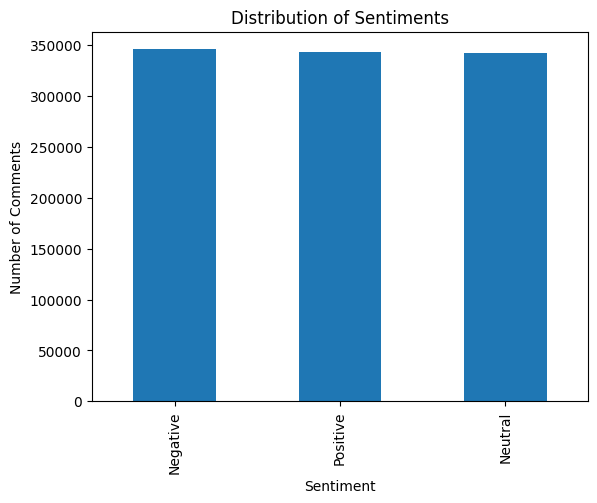

Sentiment
Negative    346075
Positive    343317
Neutral     342833
Name: count, dtype: int64

In [25]:
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.show()
df['Sentiment'].value_counts()


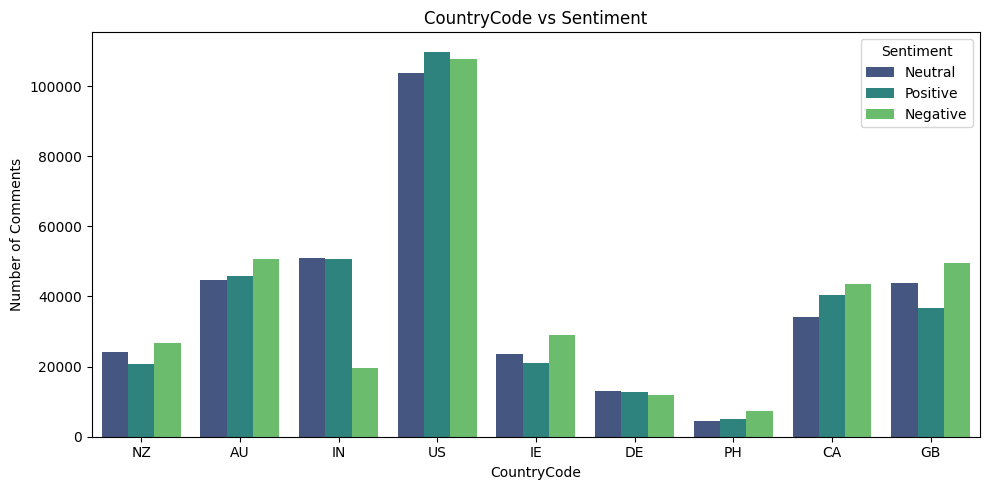

In [26]:

plt.figure(figsize=(10, 5))
sns.countplot(x='CountryCode', data=df, hue='Sentiment', palette='viridis')
plt.title("CountryCode vs Sentiment")
plt.xlabel('CountryCode')
plt.ylabel('Number of Comments')
plt.tight_layout()
plt.show()

In [27]:
df['Comment_Length'] = df['CommentText'].apply(len)

In [28]:
df['Comment_Length'].describe()


count    1.032225e+06
mean     1.071201e+02
std      1.782266e+02
min      1.000000e+00
25%      3.400000e+01
50%      6.500000e+01
75%      1.210000e+02
max      9.997000e+03
Name: Comment_Length, dtype: float64

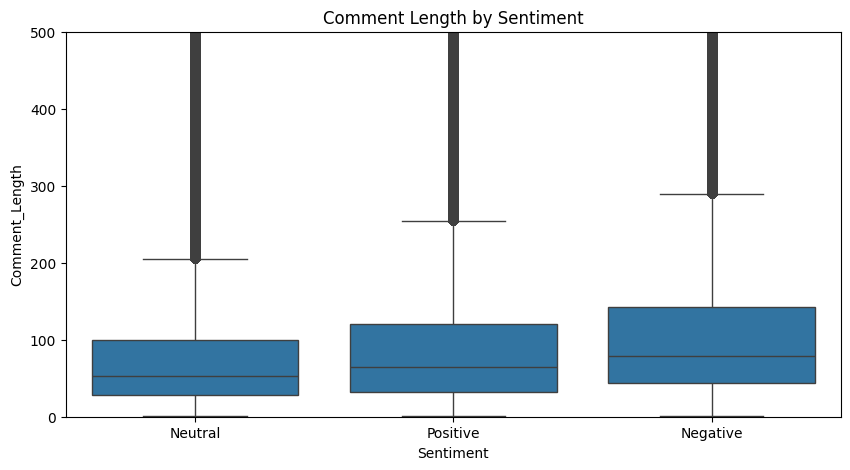

In [29]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Sentiment', y='Comment_Length')
plt.ylim(0, 500)
plt.title("Comment Length by Sentiment")
plt.show()

In [42]:
p90 = np.percentile(df["Comment_Length"], 90)
p95 = np.percentile(df["Comment_Length"], 95)
p99 = np.percentile(df["Comment_Length"], 99)

print("p90:", p90)
print("p95:", p95)
print("p99:", p99)

p90: 221.0
p95: 326.0
p99: 719.0


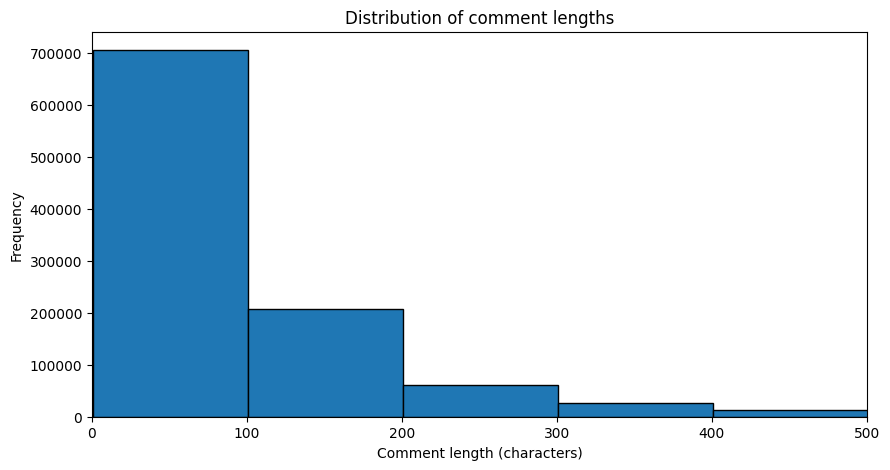

In [31]:
plt.figure(figsize=(10,5))
plt.hist(df["Comment_Length"], bins=100, edgecolor="black")
plt.title("Distribution of comment lengths")
plt.xlabel("Comment length (characters)")
plt.ylabel("Frequency")
plt.xlim(0, 500)
plt.show()

In [43]:
long_comments = df[df["Comment_Length"] > p99]
print("Long comments: ",len(long_comments))
print("long comments percentage: ", len(long_comments) / len(df) * 100)

Long comments:  10316
long comments percentage:  0.9993945118554578


In [44]:
over_1000 = (df["Comment_Length"] > 1000).sum()
over_1000_pct = over_1000 / len(df) * 100
print("Comments with more then 1000 characters: ", over_1000)
print("Percentage of comments with more then 1000 characters: ", over_1000_pct)

Comments with more then 1000 characters:  4851
Percentage of comments with more then 1000 characters:  0.46995567826781953


When i will move on to training the models, i will delete the comments that have a length > 1000

In [ ]:
under_3 = (df["Comment_Length"] < 3).sum()
under_3_pct = under_3 / len(df) * 100
print(under_3)
print("Percentage of comments with less then 4 characters: ", under_3_pct)

Number of comments with less then 4 characters:  8058
Percentage of comments with less then 4 characters:  0.7806437549952772


In [53]:
under_5 = (df["Comment_Length"] < 5).sum()
under_5_pct = under_5 / len(df) * 100
print("Number of comments with less then 6 characters: ",under_5)
print("Percentage of comments with less then 6 characters: ", under_5_pct)

Number of comments with less then 6 characters:  19095
Percentage of comments with less then 6 characters:  1.8498873792051154


In [ ]:
under_10 = (df["Comment_Length"] < 10).sum()
under_10_pct = under_10 / len(df) * 100
print("Number of comments with less then 11 characters: ",under_10)
print("Percentage of comments with less then 11 characters: ", under_10_pct)

Number of comments with less then 4 characters:  47998
Percentage of comments with less then 4 characters:  4.649955193877304


I will also delete the comments that have the length shorter then 3

In [37]:
likes_stats = df.groupby("Sentiment")["Likes"].agg(["mean", "median", "max"])
replies_stats = df.groupby("Sentiment")["Replies"].agg(["mean", "median", "max"])

likes_stats, replies_stats

(                 mean  median     max
 Sentiment                            
 Negative    54.766952     0.0  275849
 Neutral    102.034116     0.0  217740
 Positive   148.558437     1.0  193734,
                mean  median  max
 Sentiment                       
 Negative   1.985627     0.0  750
 Neutral    1.739768     0.0  751
 Positive   2.343749     0.0  751)

C:\Users\drond\AppData\Local\Temp\ipykernel_5440\2326242610.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Sentiment", y="Likes", estimator="mean", palette="viridis")


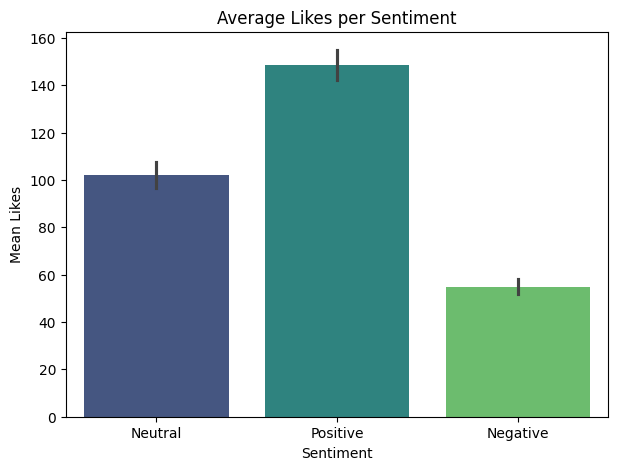

In [38]:
plt.figure(figsize=(7,5))
sns.barplot(data=df, x="Sentiment", y="Likes", estimator="mean", palette="viridis")
plt.title("Average Likes per Sentiment")
plt.ylabel("Mean Likes")
plt.show()

C:\Users\drond\AppData\Local\Temp\ipykernel_5440\3795443672.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Sentiment", y="Replies", estimator="mean", palette="viridis")


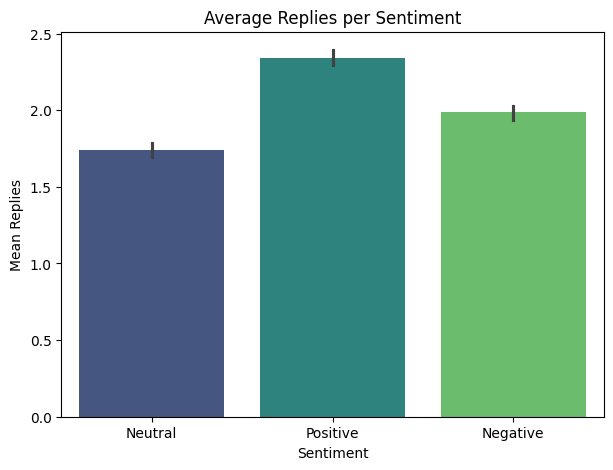

In [39]:
plt.figure(figsize=(7,5))
sns.barplot(data=df, x="Sentiment", y="Replies", estimator="mean", palette="viridis")
plt.title("Average Replies per Sentiment")
plt.ylabel("Mean Replies")
plt.show()

We can see that the comments with most likes, and most replies are the positive ones.
Negative comments get a lot of replies and very little likes.


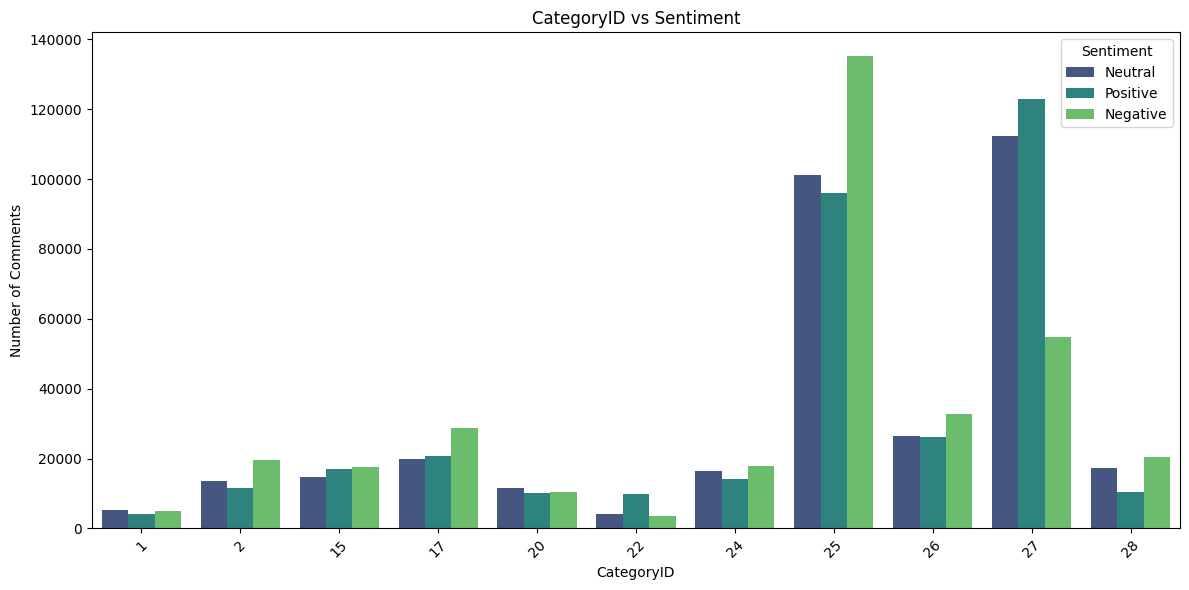

In [40]:
plt.figure(figsize=(12,6))
sns.countplot(
    data=df,
    x='CategoryID',
    hue='Sentiment',
    palette='viridis'
)
plt.title("CategoryID vs Sentiment")
plt.xlabel("CategoryID")
plt.ylabel("Number of Comments")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We can see that the  videos with the category id 25 and 27 are the most engaged type of videos.
Category id 25 has the most negative comments.